# Dimensionality Reduction

## 1. 차원축소



차원 축소는, 주어진 데이터의 차원을 고차원에서 저차원으로 축소시키는 것이다.  
 (데이터의 의미를 나타내는 특징들을 추려내는 것)  
 
 
데이터가 손실될 수도 있음에도 차원을 축소하는 이유는 **'차원의 저주'** 때문이다.

In [2]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://cdn-images-1.medium.com/max/1600/1*GoAgFuRFa8cTWSUB6d2mDA.png")

1. 차원을 늘릴수록 같은 공간에서 나타낼 수 있는 데이터가 기하급수적으로 감소(모델 학습, 예측에 시간 비용 증가)  

2. 차원이 클수록 분류기와 같은 모델들의 성능이 급격하게 감소 (noise data도 증가) 

## 2. 차원축소의 배경

기본적으로 특징을 나타내는 변수가 증가할수록 모델 성능도 좋아지지만, 실제로는 특징끼리의 의존도 때문에 나빠질 수 있다.  
 -> 그렇기 때문에 모델에 잘 작용하는 특징의 조합을 찾는다.

## 3. 차원축소 기법

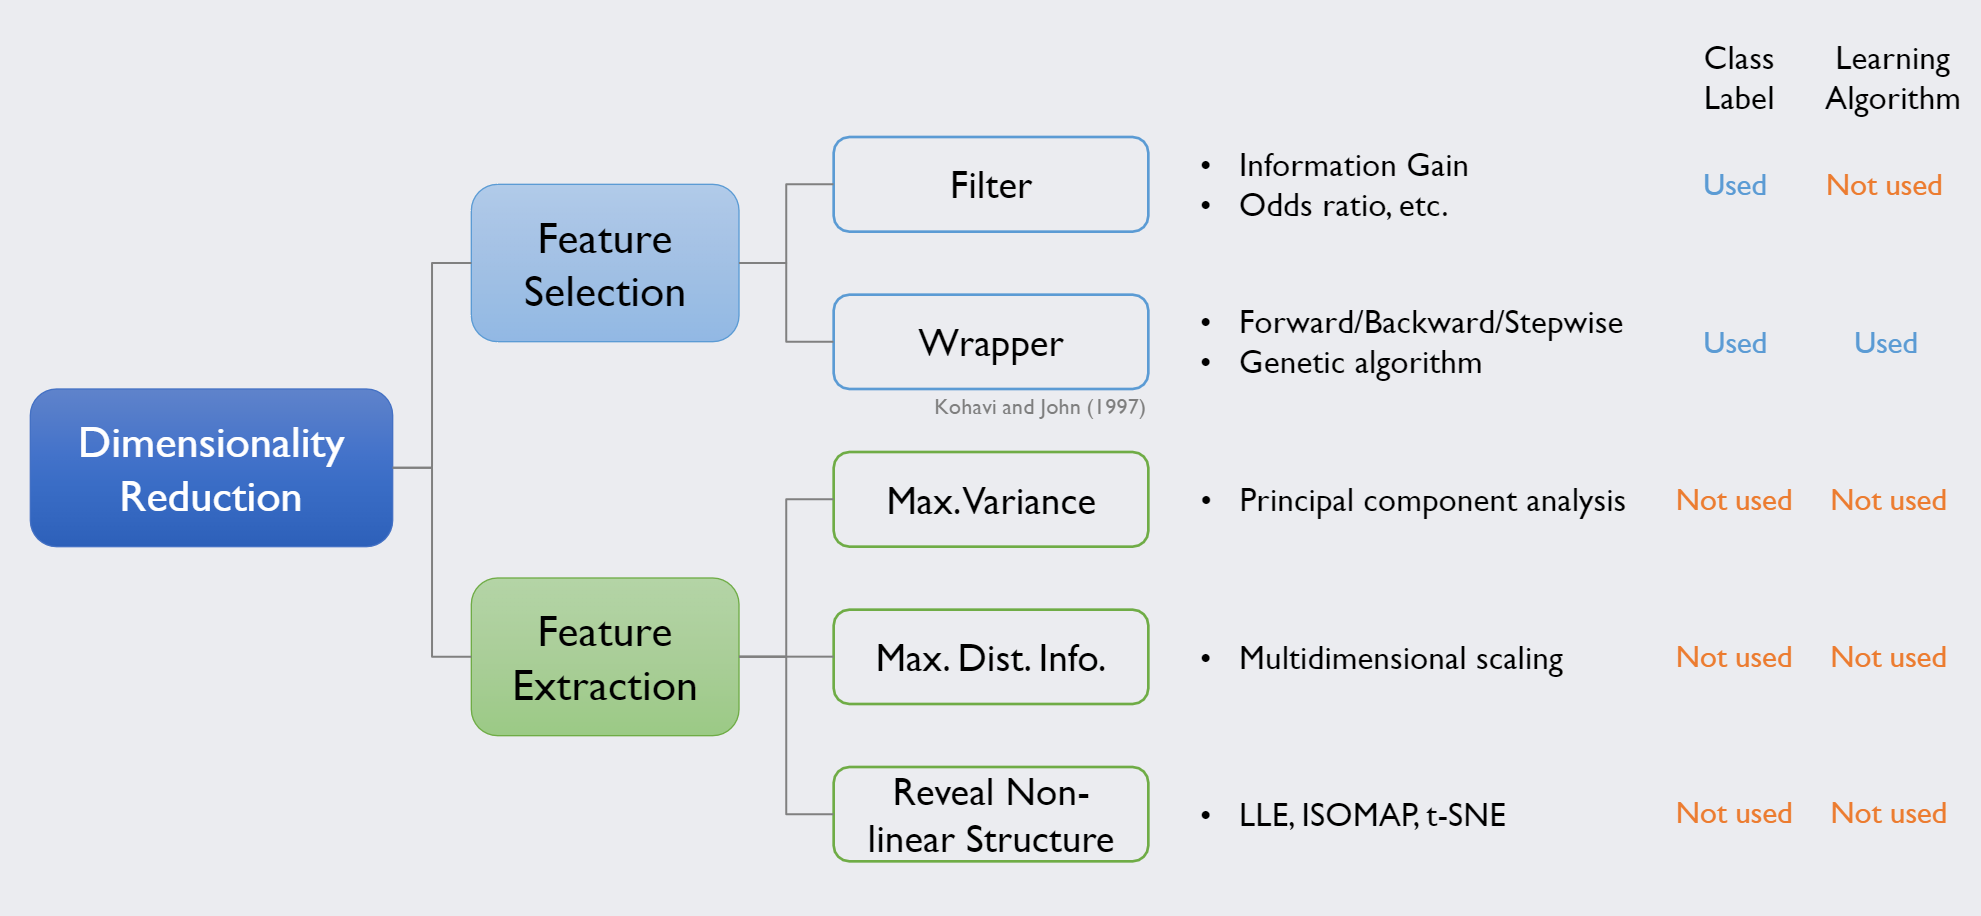

In [3]:
Image(filename="C:/Users/dsba/Downloads/차원축소/차원축소기법.png",width=700,height=350)

**Supervised** : Class Label을 이용해서 특징들을 선택하는 방법  
                    ( Filter  : 해당 변수가 추가될시 나타나는 Gain 값만을 기준으로 선택 / 변수로 인해 발생할 확률들을 기준으로 선택 )  
                    ( Wrapper : 알고리즘의 결과를 최적화하는 방향으로 선택 / Reg면 p값, DT면 acc값 등을 이용해 판단 )  
                               변수 자체가 지워지는 단점이 있다.  
**Unsupervised** : Label 없이 독립변수들만으로 새로운 특징들을 조합, 추출해내는 방법  (변수들 자체의 분산을 이용하기에 결과는 항상 같다)  
                         새롭게 만들어진 축을 설명하기 어렵다.

## 4. Supervised Feature Selection

### 1. 성능 측정 기준  

   1-1. Akaike Information Criteria  $$AIC = {n*\ln{ SSE \over n} +2k}$$  
   1-2. Bayesian Information Criteria  $$BIC = {{n*\ln{ SSE \over n}} +{2(k+2)n\sigma^2\over SSE} - {2N^2\sigma^4\over SSE^2}}$$  
    
        - 위의 두 기준은 변수가 증가할수록 Penalty를 부과하며, 에러값이 작은 것을 찾는다.  
        
        위의 기준이 최솟값을 가지면, 선택된 변수들이 데이터 손실을 최소화하면서 축소된 변수들로 종속변수를 잘 설명한다는 것  
  
   1-3. Adjusted R square  $$R^2_a = {1 - {n-1 \over n-k-1}*{SSE\over SST}}$$
        - 일반적으로 독립 변수가 추가될수록 결정 계수의 값은 항상 증가한다.  
        - 이 값을 조정해서 만들어진 조정결정계수 값으로, 적절한 변수를 선택하는 기준을 정할 수 있다.  
        
   1-4. Mallow's Cp  
        - cp는 모형 내 예측 변수 개수 균형을 맞추는데 유용.  
        - 완전모형의 정밀도와 치우침을 기준으로 변수들의 부분집합으로 이루어진 모형과 비교하는 방식.  
        
   + 어떤 기준이 가장 좋은가? / 어떤 모델에 어떤 기준이 적합한가?
    

### 2. Forward Selection / Backward Elimination / Stepwise Selection 

    2-1. Forward Selection  
        - 아무런 변수가 없는 상태에서, 중요한 변수(종속변수와 상관관계가 큰 변수)부터 차례대로 추가하는 방식.  
        - 중요한 변수부터 추가하기 때문에 한번 추가된 것은 지울 수 없음  
        - 이미 포함된 변수는 제외한 상태에서 고려하게 되는 단점( 다른 변수 조합이 더 좋을 수 있음 )   
        
    2-2. Backward Elimination  
        - 모든 변수를 포함시킨 상태에서, 중요하지 않은 변수(설명력이 작은 변수)부터 제거하는 방식.  
        - 중요한 변수가 삭제될 수도 있음  
        
    2-3. Stepwise Selection  
        - 아무런 변수가 없는 상태에서, 변수를 추가하기도 하고 제거하기도 하는 방식.  
        - 시간은 오래걸리지만 최적의 변수 셋을 찾을 가능성이 높음  
        - 큰 분산비중을 차지하는 변수부터 추가, 추가된 것 제외하고 다시 계산, 추가한 후 설명력이 낮은 변수를 제거(안 지워질 수도)  
          포함된 모든 변수가 일정 수준에 들어오고, 나머지 변수 모두 중요하지 않을 때 작동을 멈춤.  
          
    2-4. Code 구현

In [109]:
import numpy as np
from scipy.stats import t

class Variable_selection():
    
    def __init__(self,model,input_data,target_data):
        self.model = model
        self.input_data=input_data
        self.target_data=target_data
        
    def Sum_of_SQ(self,model, X, Y):
        yhat= model.predict(X) 
        SSR = sum((np.mean(Y) - yhat)**2)
        SSE = sum((Y - yhat)**2)
        df_ssr = np.shape(X)[1] #변수의 개수가 자유도
        df_sse = np.shape(X)[0] - np.shape(X)[1] # 총 데이터의 수에서 변수의 개수를 뺀 것이 에러의 자유도
        
        return SSR, SSE, df_ssr, df_sse
    
    def T_statistics(self, model, X, Y):
        params = np.append(model.intercept_, model.coef_) #모델의 상수항과 계수들을 저장
        predictions = model.predict(X)
        
        newX = np.append(np.ones((len(X),1)), X, axis=1) #모두 1인 새로운 열을 앞에 추가하는 것
        MSE = (sum((Y - predictions)**2)) / (len(newX)-len(newX[0])) #추가된만큼 빼고 즉, 전체 데이터 수로 오차제곱합평균을 냄
        
        var_b = MSE* (np.linalg.inv(np.dot(newX.T,newX)).diagonal()) #matric의 곱과 역행렬을 통해 분산을 계산
        sd_b = np.sqrt(var_b)
        ts_b = params / sd_b #각 계수를 표준편차로 나누어서 t값을 구함.
        
        p_values = [2 * (1 - t.cdf(np.abs(i), (len(newX) -1))) for i in ts_b]
        
        return ts_b, p_values
    
    def F_statistics(self,model, X, Y): #F검정값 계산
        SSR, SSE, df_ssr, df_sse = self.Sum_of_SQ(model, X, Y)
        F = (SSR / df_ssr) / (SSE / df_sse)
        return F
    
    def R_sq(self,model, X, Y): #R square 값 계산
        model_trained = model.fit(X,Y)
        yhat = model_trained.predict(X)
        SSR = np.sum((np.mean(Y) - yhat) ** 2)
        SSE = np.sum((Y - yhat) ** 2)
        SST = SSR + SSE

        r_sq = 1 - (float(SSE)) / SST
        adj_r_sq = 1 - (1 - r_sq) * (len(Y) - 1) / (len(Y) - X.shape[1] - 1)

        return r_sq, adj_r_sq
    
    # selection cells #forward selection을 위한 cell
    #종속변수와 상관있는 순서로 넣기때문에, 분산정도를 비교하는 F검정값을 이용.
    def forward_cell(self, model, candidate_var, X, Y): 
        initial_var = [n for n in range(0, np.shape(X)[1])] #0부터 변수의 수만큼 순차적인 인덱스 리스트 생성
        possible_list = np.delete(initial_var, candidate_var, 0).tolist() #candidate 는 텅빈 리스트, 즉 추가가능한 모든 변수 리스트 생성
        F_list = []

        # For all variables are selected
        if len(possible_list) == 0: #추가할 변수가 없을 경우.
            tmpX = np.take(X, candidate_var, axis=1) # 선택된 변수만 뽑아서 정리한 후 모델에 fitting.
            model.fit(tmpX, Y)
            _, p_selected = self.T_statistics(model, tmpX, Y) # 선택된 변수와, 그에 해당하는 모델의 p-value를 반환.
            return candidate_var, p_selected

        else:
            for i in range(len(possible_list)): # 추가가능한 리스트에 있는 변수를 하나씩 추가해보면서 F검정값을 리스트로 정리.
                tmp_variable = candidate_var + possible_list[i:i + 1]
                tmp_input = np.take(X, tmp_variable, axis=1)
                model.fit(tmp_input, Y)
                F = self.F_statistics(model, tmp_input, Y)

                F_list.append(F)

            selected_idx = np.argmax(F_list)  # F 검정값이 가장 큰 변수의 인덱스를 저장.
            result = candidate_var + [possible_list[selected_idx]] # 해당 변수를 추가.

            # for stopping
            model.fit(np.take(X, result, axis=1), Y) # 추가된 변수set을 모델에 fit하여, 변수set과 p-value를 반환.
            _, p_selected = self.T_statistics(model, np.take(X, result, axis=1), Y)

            return result, p_selected[1:] # 상수에 대한 값 제외.
        
    def backward_cell(self,model, candidate_var, X, Y): #backward elimination을 위한 cell #설명력이 약한 변수부터 빼기에 SSR값을 이용.

        SSR_list = []
        for i in range(len(candidate_var)): #여기선 candidate는 모든 변수 리스트, 즉 제거할 변수 리스트 생성.
            tmp_var = candidate_var[:i] + candidate_var[i + 1:]# 하나씩 변수를 빼보면서 종속변수 Y와의 SSR 값을 리스트로 정리.
            tmp_input = np.take(X, tmp_var, axis=1)
            model.fit(tmp_input, Y)
            SSR, SSE, _, _ = self.Sum_of_SQ(model, tmp_input, Y)
            SSR_list.append(SSR)

        selected_idx = np.argmax(SSR_list) # 어떤 변수를 뺀 경우 가장 SSR이 좋은지 그 인덱스를 저장하여 결과에 저장.
        result = candidate_var[:selected_idx] + candidate_var[selected_idx + 1:]

        # for stopping
        model.fit(np.take(X, result, axis=1), Y) #선택된 변수에 대한 리스트와 p-value 값을 반환
        _, p_selected = self.T_statistics(model, np.take(X, result, axis=1), Y)

        return result, p_selected[1:]
    
     # forward selection
    def forward_selection(self,alpha):
        selected_var = []

        for i in range(np.shape(self.input_data)[1]): #총 변수의 개수만큼 진행.
            # calculate selected variable #F값이 가장큰 변수를 추가.
            selected_var, p = self.forward_cell(self.model, selected_var, self.input_data, self.target_data)

            ## Stopping criteria
            # find values to remove #추가된 변수가 유의미한지 알파값과 비교하여 제거할지 결정.
            zombies = [s >= alpha for s in p]

            if True in zombies: # F값이 큰 순서대로 모든 변수를 추가하기에, p값이 유의미하지 않은 변수가 추가된 순간, 그를 지우고 break.
                selected_var = [s for s, z in zip(selected_var, zombies) if not z]
                break
        
        return selected_var
    
    #### backward elimination ####
    def backward_elimination(self,alpha):

        selected_var = [n for n in range(0, np.shape(self.input_data)[1])] #우선 모든 변수를 선택한 상태에서 시작.

        for i in range(np.shape(self.input_data)[1]): #모든 변수의 개수만큼 진행.
            # calculate selected variable #설명력이 가장 낮은 변수를 제거.
            selected_var, p = self.backward_cell(self.model, selected_var, self.input_data, self.target_data)

            ## Stopping criteria
            # find values to remove #남은 변수들 중 알파값과 비교하여 p값이 모두 유의미하게 되면 break.
            zombies = [s >= alpha for s in p]

            if True not in zombies:
                break

        return selected_var
    
    #### stepwise selection ####
    def stepwise_selection(self,alpha):
        selected_var = [] #우선 forward부터 진행.
        i = 0

        while len(selected_var) <= np.shape(self.input_data)[1]: #모든 변수에 대한 test가 아니고, 추가제거가 반복되기에 변수길이 내에서 진행.
            if len(selected_var) == np.shape(self.input_data)[1]: #만약 모든 변수가 채워지면, 유의미하지 않으면 제거하고 break, 유의미하면 break.
                zombies = [s >= alpha for s in p]
                if True in zombies:
                    selected_var = [s for s, z in zip(selected_var, zombies) if not z]
                    break
                else:
                    break
            if i <= 1:#우선 두개 변수 추가. 세개째부터 고려되지 않은 조합이 발생하기 때문.
                # do forward selection
                selected_var, p = self.forward_cell(self.model, selected_var, self.input_data, self.target_data)
            else:
                # backup for comparision
                var_before = np.copy(selected_var).tolist()
                
                # do forward selection
                selected_var, p = self.forward_cell(self.model, selected_var, self.input_data, self.target_data)
                
                # do backward selection
                selected_var, p = self.backward_cell(self.model, selected_var, self.input_data, self.target_data)

                ## Stopping criteria
                zombies = [s >= alpha for s in p]
                if var_before == selected_var:# 추가한 것과 제거한 것이 다르면 계속 진행.

                    if True in zombies: #추가한 것과 제거한 변수가 같은 경우, 변수 중 무의미한 변수가 있을 경우 그를 제거하고 break.
                        selected_var = [s for s, z in zip(selected_var, zombies) if not z]
                        break
                    # prevent infinite roop
                    else: # 무의미한 변수가 없을 경우, forward로 하나 선택 추가.
                        selected_var, p = self.forward_cell(self.model, selected_var, self.input_data, self.target_data)
            i += 1

        return selected_var #우선 추가부터 진행하다가, 추가-제거 과정에서 변화가 없으면, 
                            #무의미한 변수를 제거하고 stop, 모두 유의미하면 하나 추가.

In [5]:
#################################### Forward, Backward, Stepwise #######################################
import numpy as np
import pandas as pd
from sklearn import linear_model as lm


In [115]:
# import data
from sklearn.datasets import load_boston
boston = load_boston()

# divide to input and target data
# remove categorical variable part
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
input_data = np.array(data)

# target : price
target_data = np.array(boston.target)
print (np.shape(input_data))
# regression model
reg = lm.LinearRegression()

# make class
selection_tech = Variable_selection(model=reg,input_data=input_data,target_data=target_data)

(506, 13)


In [116]:
# forward selection
var_fw = selection_tech.forward_selection(alpha=0.1)
names = boston.feature_names
selected_names = [names[i] for i in var_fw]
print(selected_names)

['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'CHAS', 'B', 'ZN', 'CRIM', 'RAD', 'TAX']


In [117]:
# backward elimination
var_bw = selection_tech.backward_elimination(alpha=0.1)
selected_names = [names[i] for i in var_bw]
print(selected_names)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [118]:
# stepwise selection
var_st = selection_tech.stepwise_selection(alpha=0.1)
selected_names = [names[i] for i in var_st]
print(selected_names)

['LSTAT', 'RM', 'PTRATIO', 'DIS', 'NOX', 'B', 'CRIM', 'RAD', 'TAX', 'ZN', 'CHAS']


### 3. Genetic Algorithm  

    3-1. 등장배경  
        - 변수 선택 추가, 제거법은 탐색 공간도 제한적이어서 최적의 subset을 찾기 어렵다  
        - 적은 계산량으로 변수를 탐색해서 성능을 올리고자 고안되었음  
        
    3-2. 소개  
        - Heuristic Method로 생물의 번식과정을 모방한 진화론적 알고리즘  
        - Selection : 우위에 있는 염색체를 가져옴 특정 자리를 변형해 local optima 회피)  
        - Crossover : 염색체끼리의 다양한 교체 방식을 통해 다음 세대 염색체를 만듬
        - Mutation : 염색체의 특정 위치의 값 변경을 통해 다음 세대 염색체를 만듬  
        
    3-3. 변수선택에서의 GA  
        1. 각 변수를 사용하면 1, 아니면 0으로 Chromosome 들을 형성 (1의 비율을 절반정도로 구성-상관은 없음)  
        2. Chromosome의 적합도를 산출하는 Fitness 설정(다중선형회귀의 경우 - AIC, BIC, R square) - 관례적으로 높을수록 좋게 설정  
        3. 상위 N% selection, or ,구간별로 확률적으로 select 
        4. 다양한 Crossover points 로 다음 세대 형성 - 3,4번 과정을 population이 채워질 때까지 반복  
        5. local optima에 빠지지 않으면서, 수렴에 너무 오래 걸리지 않도록 mutation rate를 설정(교차생성된 cromo의 모든 gene에 대해)  
        6. Chromosome들이 특정 수 이상 같거나, 특정 정지 기준을 만족하면 작업을 멈추고 수렴된 chromosome에 해당하는 변수 set을 출력  
        
    + 보편적으로 deterministic 과 probabilistic 중 우수한 것은? / C.O 의 다양한 방식? / 정지 기준?(같은 크로모좀n%이상, 회수지정)

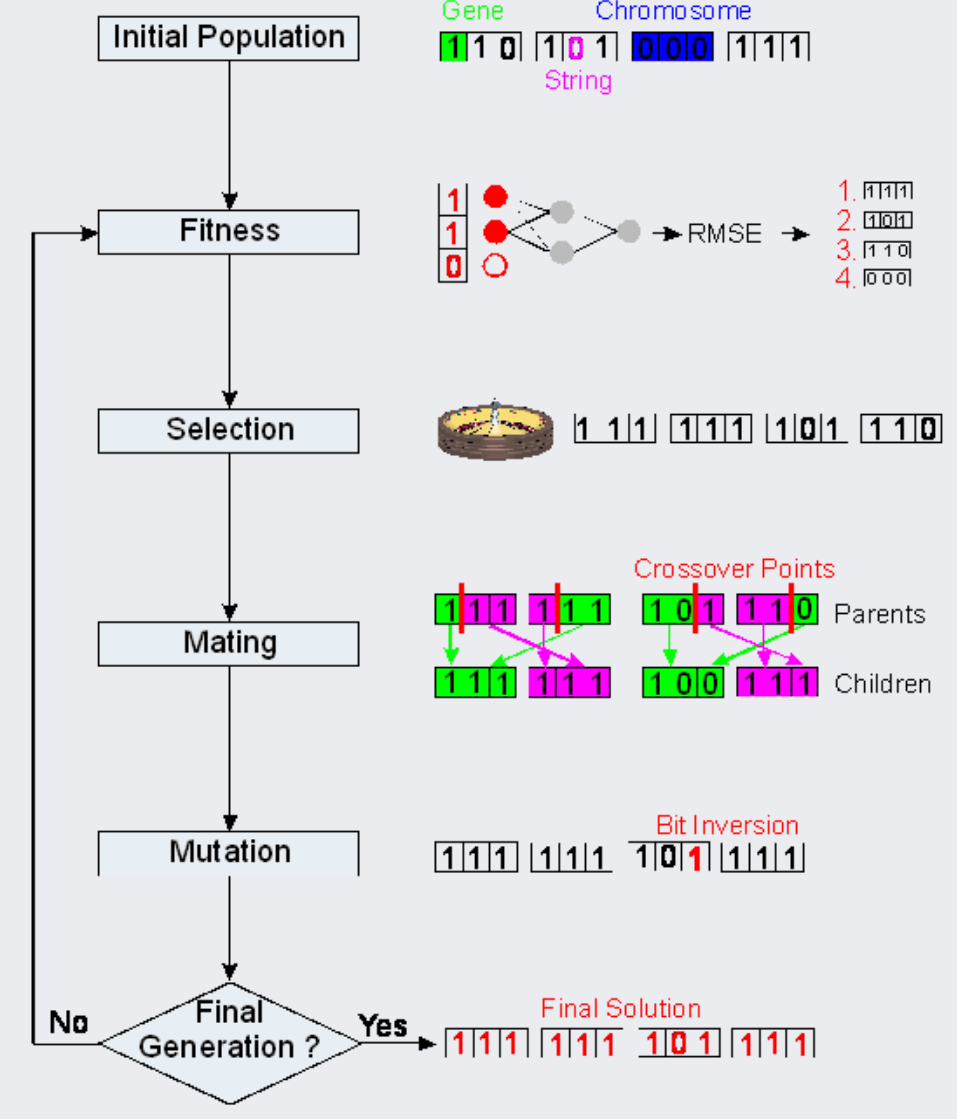

In [8]:
Image(filename="C:/Users/dsba/Downloads/차원축소/GA.png",width=400,height=450)

   3-4. code 구현

In [119]:
import numpy as np
import math

class Genetic_algorithm:

    
    def __init__(self,model,X,Y,chrom_num,eval_metric,chrom_ratio=0.5,top_num=2):
        '''
        :param model: models to fit
        :param X: input data
        :param Y: target data
        :param chrom_num: number of chroms (should be even number)
        :param eval_metric: metrics for evaluation, 'AIC', 'BIC', 'adj_Rsq' should be used
        :param chrom_ratio: probability of chroms to be 1
        :param top_num: number of parents that will transfer to next generation
        '''
        self.model = model
        self.X = X
        self.Y = Y
        self.chrom_num = chrom_num
        self.eval_metric = eval_metric
        self.chrom_ratio = chrom_ratio
        self.top_num = top_num
        self.variable_num = np.shape(X)[1]

    def metric(self,X,Y):
        model_fitted = self.model.fit(X, Y)
        yhat = model_fitted.predict(X)
        SSR = np.sum((np.mean(Y) - yhat) ** 2)
        SSE = np.sum((Y - yhat) ** 2)
        SST = SSR + SSE

        AIC = X.shape[0] + X.shape[0] * np.log(2*math.pi) + \
              X.shape[0] * np.log(SSE / X.shape[0]) + 2 * (X.shape[1] + 1)
        BIC = X.shape[0] + X.shape[0] * np.log(2*math.pi) + \
              X.shape[0] * np.log(SSE / X.shape[0]) + np.log(X.shape[0]) * (X.shape[1] + 1)
        r_sq = SSR/SST
        adj_r_sq = 1 - (1 - r_sq) * ( len(Y) - 1) / ( len(Y) - X.shape[1] - 1)

        return {"adj_Rsq": adj_r_sq, "AIC": AIC, "BIC":BIC}

    def T_statistics(self,model, X, Y):
        params = np.append(model.intercept_, model.coef_)
        predictions = model.predict(X)

        newX = np.append(np.ones((len(X), 1)), X, axis=1)
        MSE = (sum((Y - predictions) ** 2)) / (len(newX) - len(newX[0]))

        var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())
        sd_b = np.sqrt(var_b)
        ts_b = params / sd_b

        p_values = [2 * (1 - t.cdf(np.abs(i), (len(newX) - 1))) for i in ts_b]

        return ts_b, p_values

    def top_k_idx(self,input):
        return np.argpartition(input, -self.top_num)[-self.top_num:]

    def fitness_eval(self,candidates):
        eval_values = []
        for i in range(len(candidates)):
            # error message when 0 variable selected
            if sum(candidates[i]) == 0:
                raise ValueError('0 variables selected, Please use chrom ratio greater than %.2f'%(self.chrom_ratio))
            selected_col = [c for c, v in zip(range(self.variable_num), candidates[i]) if v == 1]
            tmp_input = np.take(self.X, selected_col, axis=1)
            tmp_metric = self.metric(tmp_input, self.Y)[self.eval_metric]
            eval_values.append(tmp_metric)

        return eval_values

    def cross_over(self, candidates, eval_values):
        probs = eval_values / sum(eval_values)

        # non-negative probability to 0
        for i in range(len(probs)):
            if probs[i] < 0:
                probs[i] = 0
            else:
                pass
        probs = probs / sum(probs)

        dart_num = int((self.chrom_num - self.top_num) / 2)

        ### Cross over
        new_babies = []
        for i in range(dart_num):
            # select paranets
            selected_idx = np.random.choice(len(candidates), size=2, replace=False, p=probs)
            selected_babies = np.take(candidates, selected_idx, axis=0)

            # cross over
            cross_point = [s >= 0.5 for s in np.random.uniform(0, 1, size=self.variable_num)]

            new_baby_1 = []
            new_baby_2 = []

            # do cross over
            for i in range(len(cross_point)):
                if cross_point[i]:
                    new_baby_1.append(selected_babies[0][i])
                    new_baby_2.append(selected_babies[1][i])
                else:
                    new_baby_1.append(selected_babies[1][i])
                    new_baby_2.append(selected_babies[0][i])

            new_babies.append(new_baby_1)
            new_babies.append(new_baby_2)

        return new_babies
    
    def mutate(self,candidates,mutate_ratio):
        # generate mutents
        mutent = np.random.choice(a=[False, True], size=np.shape(candidates), p=[1 - mutate_ratio, mutate_ratio])
        # backup original set
        cand_bakup = np.copy(candidates)

        # change mutents
        if True in mutent:
            loc_f, loc_s = np.where(mutent)
            for i in range(len(loc_f)):
                if cand_bakup[loc_f[i]][loc_s[i]] == 1:
                    cand_bakup[loc_f[i]][loc_s[i]] = 0
                else:
                    cand_bakup[loc_f[i]][loc_s[i]] = 1
        else:
            pass

        return cand_bakup

    def Do_GA(self,max_iter,mutate_ratio=0.01):
        # Initialize
        babies = []
        for i in range(self.chrom_num):
            # generate one chrom
            baby = np.random.choice([0, 1], size=(self.variable_num,), p=[ 1 - self.chrom_ratio,self.chrom_ratio])
            # append
            babies.append(baby)

        # Iteration loop
        for i in range(max_iter):
            # Fitness evaluation
            eval_values = self.fitness_eval(candidates=babies)

            # Find top k
            top_n = np.take(babies, self.top_k_idx(eval_values), axis=0)

            # Cross over
            new_babies = self.cross_over(candidates=babies, eval_values=eval_values)

            # Mutate
            mutent_babies = self.mutate(candidates=new_babies,mutate_ratio=mutate_ratio)

            # Merge top k and final variable set
            next_generation = np.vstack((top_n, mutent_babies))

            if (i + 1) % 10 == 0:
                print("Finished %dth generation !!" % (i + 1))

        # Final evaluation
        final_eval = self.fitness_eval(candidates=next_generation)
        final_select_idx = np.argmax(final_eval)
        final_variables = [c for c, v in zip(range(self.variable_num), babies[final_select_idx]) if v == 1]

        return final_variables, final_eval[final_select_idx]

In [125]:
# regression model
reg = lm.LinearRegression()

# make class
Genetic_al = Genetic_algorithm(model=reg,X=input_data,Y=target_data,chrom_num=100,eval_metric='adj_Rsq',chrom_ratio=0.5)
var_GA, eval = Genetic_al.Do_GA(max_iter=100)

Finished 10th generation !!
Finished 20th generation !!
Finished 30th generation !!
Finished 40th generation !!
Finished 50th generation !!
Finished 60th generation !!
Finished 70th generation !!
Finished 80th generation !!
Finished 90th generation !!
Finished 100th generation !!


In [126]:
selected_names = [names[i] for i in var_GA]
print(selected_names)

['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO']


### 4. Shrinkage methods - 선형회귀 계수의 크기를 제한하는 방법으로 모형의 과최적화를 막는 방법  

   4-1. Ridge regression  $$RSS + \lambda * \sum_{j=1}^p B_j^2$$  
        - 계수에 대해 패널티를 부여해서 그 제곱합을 비용함수에 추가한다.  
        - lambda 값에 따라 bias-variance tradeoff가 발생  
        - 변수 scale을 맞춰줘야 함  
        - L2 regularization
        
   4-2. Lasso regression  $$RSS + \lambda * \sum_{j=1}^p \left\vert B_j \right\vert$$ 
        - Ridge와 다르게 절대값 합을 추가한다.  
        - lambda가 매우 커지면 계수를 0으로 보냄으로써 '변수선택이 가능'함
        - 독립변수와 종속변수간의 독립성이 유지되는 데이터의 경우 ridge보다 성능이 좋다.  
        - L1 regularization (변수를 선택하므로 변수가 많은 데이터에 이용)

   4-3. elastic net regression  
        - ridge 는 모든 변수는 유지시키지만 성능이 저하됨  
        - lasso 는 정보 손실이 생길 수 있음  
        
        - 따라서 L1, L2를 적절히 조절